In [27]:
import thermofun as fun #thermo. properties at T-P-X
import reaktoro as rkt # Gibbs free energy minimization
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# create base dataset from mines19 data file
database = fun.Database("../data/raw/thermodynamic_data/mines19-thermofun.json");

# add critical parameters for gases (missing in ThermoFun data files)
database.appendData("../data/raw/thermodynamic_data/slop98-gases-crit-thermofun.json");

# add Co aqueous species
database.appendData("../data/raw/thermodynamic_data/Co_aq_species_thermo.json");
database.appendData("../data/raw/thermodynamic_data/Co-S_aq_species_thermo_Migdisov_etal_2011_OptimC.json");
# database.appendData("../data/raw/thermodynamic_data/Co-Cl_aq_species_thermo_Liu_etal_2011.json");
database.appendData("../data/raw/thermodynamic_data/Co-Cl_aq_species_thermo_Migdisov_etal_2011_OptimC.json");

# add Co minerals 
database.appendData("../data/raw/thermodynamic_data/Co_mineral_thermo.json");

db = rkt.ThermoFunDatabase(database)

The element with symbol H is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The element with symbol C is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The element with symbol O is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The element with symbol S is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The substance with symbol H2O(g) is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The substance with symbol CH4(g) is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The substance with symbol CO2(g) is already in the database. Overwritting ...
To add it to the dat

In [6]:
aqueous_phase = rkt.AqueousPhase(rkt.speciate("H O Na Cl Co S"))
mineral_phases = rkt.MineralPhases(["Linnaeite", "Cattierite", "Co-pentlandite", "CoO(s)", "Co3O4(s)", "Co(s)"])

phases = rkt.Phases(db)

phases.add(aqueous_phase)
phases.add(mineral_phases)

system = rkt.ChemicalSystem(phases)


In [7]:
print([species.name() for species in system.species()])

['Cl-', 'ClO-', 'ClO4-', 'Co+2', 'Co+3', 'CoCl+', 'CoCl2@', 'CoCl3-', 'CoCl4-2', 'CoH2S+2', 'CoHS+', 'CoO2-2', 'CoO@', 'CoOH+', 'CoOH+2', 'H+', 'H2@', 'H2O2@', 'H2O@', 'H2S2O3@', 'H2S2O4@', 'H2S@', 'HCl@', 'HClO@', 'HCoO2-', 'HO2-', 'HS-', 'HS2O3-', 'HS2O4-', 'HSO3-', 'HSO4-', 'HSO5-', 'Na(SO4)-', 'Na+', 'NaCl@', 'NaOH@', 'O2@', 'OH-', 'S2-2', 'S2O3-2', 'S2O4-2', 'S2O5-2', 'S2O6-2', 'S2O8-2', 'S3-2', 'S3O6-2', 'S4-2', 'S4O6-2', 'S5-2', 'S5O6-2', 'SO2@', 'SO3-2', 'SO4-2', 'Linnaeite', 'Cattierite', 'Co-pentlandite', 'CoO(s)', 'Co3O4(s)', 'Co(s)']


# Reactions

## mineral-mineral 
### linnaeite-Cobaltpentlandite 
$$3Co_3S_4 + 4H_2O° \leftrightarrow Co_9S_8 + 4H_2S° + 2O_2°$$ 
$$3Co_3S_4 + 4H_2O° \leftrightarrow Co_9S_8 + 4HS^- + 4H^+ + 2O_2°$$ 
$$3Co_3S_4 + 4H^+ + 8O_2° \leftrightarrow Co_9S_8 + 4HSO_4^-$$ 
$$3Co_3S_4 + 4H_2O° + 6O_2° \leftrightarrow Co_9S_8 + 4SO_4^{-2} + 8H^+$$ 

### cattierite-linnaeite
$$3CoS_2 + 2H_2O° \leftrightarrow Co_3S_4 + 2H_2S° + O_2°$$
$$3CoS_2 +  2H_2O° \leftrightarrow Co_3S_4 + 2HS^- + 2H^+ + O_2°$$
$$3CoS_2 + 2H_2O° + 3O_2° \leftrightarrow Co_3S_4 + 2HSO_4^- + 2H^+$$
$$3CoS_2 + 2H_2O° + 6O_2° \leftrightarrow Co_3S_4 + 2SO_4^{-2} + 4H^+$$

### $Co_3O_4$-Cobaltpentlandite
$$3Co_3O_4 + 8HSO_4^- + 8H^+ \leftrightarrow Co_9S_8 + 8H_2O° + 12O_2°$$
$$3Co_3O_4 + 8SO_4^{-2} + 16H^+ \leftrightarrow Co_9S_8 + 8H_2O° + 12O_2°$$

## mineral-aq species

## aq species-aq species (predominance)



In [8]:
min_min_rxns = ["3Linnaeite + 4H2O@         = Co-pentlandite + 4H2S@ + 2O2@", 
                "3Linnaeite + 4H2O@         = Co-pentlandite + 4HS- + 4H+ + 2O2@", 
                "3Linnaeite + 4H2O@ + 6O2@  = Co-pentlandite + 4SO4-2 + 8H+", 
                "3Cattierite + 2H2O@        = Linnaeite + 2H2S@ + O2@", 
                "3Cattierite + 2H2O@        = Linnaeite + 2HS- + 2H+ + O2@",
                "3Cattierite + 2H2O@ + 3O2@ = Linnaeite + 2HSO4- + 2H+", 
                "3Cattierite + 2H2O@ + 3O2@ = Linnaeite + 2SO4-2 + 4H+", 
                "3Co3O4(s) + 4HSO4- + 4H+   = Linnaeite + 4H2O@ + 8O2@",
                "3Co3O4(s) + 8SO4-2 + 16H+  = Co-pentlandite + 8H2O@ + 18O2@"
                ]
aq_aq_rxns = ["H2S@        = HS- + H+", 
              "H2S@ + 2O2@ = HSO4- + H+", 
              "H2S@ + 2O2@ = SO4-2 + 2H+", 
              "HS- + 2O2@  = SO4-2 + H+", 
              "HSO4-       = SO4-2 + H+"
             ]

min_aq_rxns = ["Co-pentlandite + 36Cl- + 18H+ + 0.5O2@ = 9CoCl4-2 + 8H2S@ + H2O@", 
               "Linnaeite + 12Cl- + 6H+ + H2O@         = 3CoCl4-2 + 4H2S@ + 0.5O2@", 
               "Cattierite + 4Cl- + 2H+ + H2O@         = CoCl4-2 + 2H2S@ + 0.5O2@", 
               "Cattierite + 4Cl- + H2O@ + 3.5O2@      = CoCl4-2 + 2HSO4-", 
               "Cattierite + 4Cl- + H2O@ + 3.5O2@      = CoCl4-2 + 2SO4-2 + 2H+", 
               "Linnaeite + 12Cl- + H2O@ + 7.5O2@      = 3CoCl4-2 + 4SO4-2 + 2H+", 
               "Co-pentlandite + 36Cl- + 2H+ + 16.5O2@ = 9CoCl4-2 + 8SO4-2 + H2O@", 
               "Co3O4(s) + 12Cl- + 6H+                 = 3CoCl4-2 + 3H2O@ + 0.5O2@"
              ]

In [9]:
engine = fun.ThermoEngine(database)

In [10]:
T = 150+273.15
P = rkt.waterSaturatedPressureWagnerPruss(T)[0]/100000 # [bar] 

In [11]:
min_min_logK = []
for rxn in min_min_rxns: 
    rxn_properties = engine.thermoPropertiesReaction(T, P, rxn) 
    min_min_logK.append(rxn_properties.log_equilibrium_constant.val)

min_aq_logK = []
for rxn in min_aq_rxns: 
    rxn_properties = engine.thermoPropertiesReaction(T, P, rxn) 
    min_aq_logK.append(rxn_properties.log_equilibrium_constant.val)

aq_aq_logK = []
for rxn in aq_aq_rxns: 
    rxn_properties = engine.thermoPropertiesReaction(T, P, rxn) 
    aq_aq_logK.append(rxn_properties.log_equilibrium_constant.val)


In [ ]:
logaCoCl4 = 
logaCl =
logaH2S = 
logaHS = 
logaHSO4 = 
logaSO4 = 

In [30]:
pH_vert = []
logaO2 = []

pH = np.arange(0,13)
print(logaH)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [31]:
# HORIZONTAL
# ## mineral-mineral
# logaO2.append(0.5*min_min_logK[0] - 2*logaH2S)
# logaO2.append(min_min_logK[3] - 2*logaH2S)

# ## mineral-aqueous
# logaO2.append(-1/3*min_aq_logK[3] + 1/3.5*logaCoCl4 + 2/3.5*logaHSO4 - 4/3.5*logaCl)


# VERTICAL
## aqueous-aqueous
# pH_vert.append(-aq_aq_logK[0] + logaHS - logaH2S)
pH_vert.append(-aq_aq_logK[0])
# pH_vert.append(-aq_aq_logK[4] + logaSO4 - logHSO4)
pH_vert.append(-aq_aq_logK[4])


# BOTH 
# ## mineral-mineral
# logaO2.append(0.5*min_min_logK[1] - 2*logaHS + 2*pH)
# logaO2.append(-1/6*min_min_logK[2] + 2/3*logaSO4 - 4/3*pH)
# logaO2.append(min_min_logK[4] - 2*logaHS - 2*logaH)
# logaO2.append(-1/3*min_min_logK[5] + 2/3*logaHSO4 - 2/3*pH)
# logaO2.append(-1/3*min_min_logK[6] + 2/3*logaSO4 - 4/3*pH)
# logaO2.append(1/8*min_min_logK[7] + 1/2*logaHSO4 - 1/2*pH)
# logaO2.append(1/18*min_min_logK[8] + 8*logaSO4 - 8/9*pH)

# ## mineral-aqueous
# logaO2.append(-2*min_aq_logK[0] + 18*logaCoCl4 + 16*logaH2S - 72*logaCl + 36*pH)
# logaO2.append(2*min_aq_logK[1] - 6*logaCoCl4 - 8*logaH2S + 24*logaCl - 12*pH)
# logaO2.append(2*min_aq_logK[2] - 2*logaCoCl4 - 4*logaH2S + 8*logaCl - 4*pH)
# logaO2.append(-1/3.5*min_aq_logK[4] + 1/3.5*logaCoCl4 + 2/3.5*logaSO4 - 2/3.5*pH - 4/3.5*logaCl)
# logaO2.append(-1/7.5*min_aq_logK[5] + 3/7.5*logaCoCl4 + 4/7.5*logaSO4 - 2/7.5*pH - 12/7.5*logaCl)
# logaO2.append(-1/16.5*min_aq_logK[6] + 9/16.5*logaCoCl4 + 8/16.5*logaSO4 - 36/16.5*logaCl + 2/16.5*pH)
# logaO2.append(-2*min_aq_logK[7] - 6*logaCoCl4 + 24*logaCl - 12*pH)

## aqueous-aqueous
# logaO2.append(-1/2*aq_aq_logK[1] + 1/2*logaHSO4 - 1/2*pH - 1/2*logaH2S)
logaO2.append(-1/2*aq_aq_logK[1] - 1/2*pH)
# logaO2.append(-1/2*aq_aq_logK[2] + 1/2*logaSO4 - pH - 1/2*logaH2S)
logaO2.append(-1/2*aq_aq_logK[2] - pH)
# logaO2.append(-1/2*aq_aq_logK[3] + 1/2*logaSO4 - 1/2*pH - 1/2*logaHS)
logaO2.append(-1/2*aq_aq_logK[3] - 1/2*pH)

ValueError: x and y must have same first dimension, but have shapes (1,) and (13,)

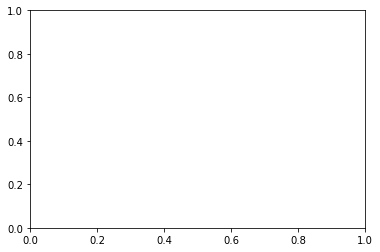

In [177]:
for line in logaO2:
    plt.plot(pH, line)
for line in pH_vert: 
    plt.axvline(line)

In [140]:
phases = rkt.Phases(db)

aqueous_phase = rkt.AqueousPhase(["H2O@", "O2@", "H2@", "H+", "OH-", "H2S@", "HS-", "HSO4-", "SO4-2"])
phases.add(aqueous_phase)

gaseous_phase = rkt.GaseousPhase(["H2O(g)", "O2(g)", "H2(g)"])
phases.add(gaseous_phase)


system = rkt.ChemicalSystem(phases)


In [39]:
print([species.name() for species in system.species()])

['H2O@', 'O2@', 'H2@', 'H+', 'OH-', 'H2S@', 'HS-', 'HSO4-', 'SO4-2']


In [50]:
pH_values = np.linspace(0, 12, 10)
logfO2_values = np.linspace(-20, -60, 10)

mesh = np.meshgrid(pH_values, logfO2_values)

In [47]:
def addpHConstraint(specs): 
    idx_pH = specs.addInput("pH")

    pH_constraint = rkt.ConstraintEquation()
    pH_constraint.id = "pH"
    pH_constraint.fn = lambda props, w : w[idx_pH] - rkt.AqueousProps(props).pH()
    specs.addConstraint(pH_constraint)

def addSConstraint(specs): 
    idx_S = specs.addInput("S")

    S_constraint = rkt.ConstraintEquation()
    S_constraint.id = "S"
    
    def SFunction(props, w): 
        aq_props = rkt.AqueousProps(props)
        model_S_conc = aq_props.elementMolality("S") 
        return w[idx_S] - model_S_conc
        
    S_constraint.fn = SFunction   
    specs.addConstraint(S_constraint)

In [81]:
# Specify equilibrium constraints
specs = rkt.EquilibriumSpecs(system)

specs.temperature()       
specs.pressure() 

# control variables
specs.fugacity("O2(g)")
specs.pH()
addSConstraint(specs)

# explicit titrant
specs.openTo("H2S") # arbitrary substance

print("Inputs: ", specs.namesInputs())
print("Params: ", specs.namesParams())
print("ControlVariables: ", specs.namesControlVariables())
print("ControlVariablesP: ", specs.namesControlVariablesP())
print("ControlVariablesQ: ", specs.namesControlVariablesQ())
print("Titrants: ", specs.namesTitrants())
print("Titrants Explicit: ", specs.namesTitrantsExplicit())
print("Titrants Implicit: ", specs.namesTitrantsImplicit())
print("Constraints: ", specs.namesConstraints())

solver = rkt.EquilibriumSolver(specs)
conditions = rkt.EquilibriumConditions(specs)

Inputs:  ['T', 'P', 'f[O2(g)]', 'pH', 'S']
Params:  []
ControlVariables:  ['[H2S]', '[O2(g)]', '[H+]']
ControlVariablesP:  ['[H2S]']
ControlVariablesQ:  ['[O2(g)]', '[H+]']
Titrants:  ['[H2S]', '[O2]', '[H+]']
Titrants Explicit:  ['[H2S]']
Titrants Implicit:  ['[O2]', '[H+]']
Constraints:  ['S', 'f[O2(g)]', 'pH']


In [79]:
temperature = 200 + 273.15 # [K]
pressure = rkt.waterSaturatedPressureWagnerPruss(temperature)[0] # [Pa]

In [87]:
states = []

state = rkt.ChemicalState(system)
state.add("H2O@", 1, "kg")

for pH, logfO2 in zip(mesh[0].flatten(), mesh[1].flatten()): 
    # set T, P constraints
    conditions.temperature(temperature, "kelvin")
    conditions.pressure(pressure, "Pa")

    # set fO2 constraint
    conditions.fugacity("O2(g)", 1e-40, "bar")

    # set custom pH and S constraints
    conditions.set("pH", 1)
    conditions.set("S", 0.001) # [molal]

    state = rkt.ChemicalState(state)

    result = solver.solve(state, conditions) 

    states.append(state)

In [115]:
# constraint_values = []
# for constraint in self.constraints: 
#     constraint_values.append(constraint.value)

# mesh_values = np.meshgrid(*constraint_values)

# flattened_values = []
# for dim in mesh_values: 
#     flattened_values.append(dim.flatten())

# for condition in zip(*flattened_values): 
#     for value, constraint in zip(condition, self.constraints): 
#         print(constraint.name, value)

In [159]:
equilibrater = ConstrainedEquilibration(system)

T = equilibrater.addConstraint(             "temperature", 150 + 273.15,                                "kelvin")
equilibrater.addConstraint(                 "pressure",    rkt.waterSaturatedPressureWagnerPruss(T)[0], "Pa");
fO2_values = equilibrater.addConstraint(    "fO2",         10**np.linspace(-20, -60, 10),               "bar");
pH_values = equilibrater.addConstraint(     "pH",          np.linspace(0, 12, 10));
equilibrater.addConstraint(                 "S",           0.001,                                       "molal");

equilibrater.initialize("H2O@", 1, "kg")

states = equilibrater.equilibrate()


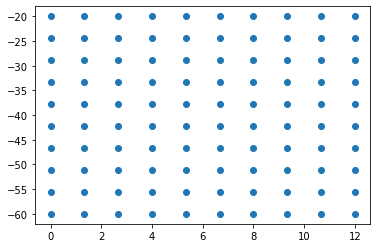

In [176]:
points_plot = np.meshgrid(pH_values, np.log10(fO2_values))
plt.scatter(*zip(dim.flatten() for dim in points_plot))